# ***Achmad Rero Sindunata***

## Import Librari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_info_rows', 1000)

## Data Loading

In [2]:
#df_test = pd.read_csv('application_test.csv')
df_train = pd.read_csv('application_train.csv')

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [ ]:
df_test.shape

(48744, 121)

In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

***Dari data describe diatas, didapati kejanggalan pada data DAYS_EMPLOYED karena data max dan min memiliki jarak yang sangat jauh, akan dicek lagi ditahap selanjutnya.***

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data Visualization

In [ ]:
kat_data = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [ ]:
df_train['TARGET'].unique()

array([1, 0])

Data TARGET :
 0    282686
1     24825
Name: TARGET, dtype: int64


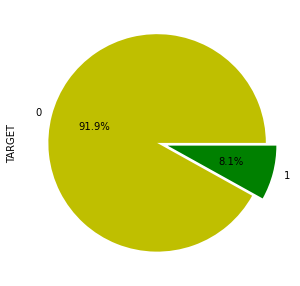

In [ ]:
#Untuk melihat proporsi dari variabel TARGET
explode = (0, 0.1)
color = ('y', 'g')

print('Data TARGET :\n', df_train['TARGET'].value_counts())
df_train['TARGET'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5), explode = explode, colors = color)

Data TARGET :
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


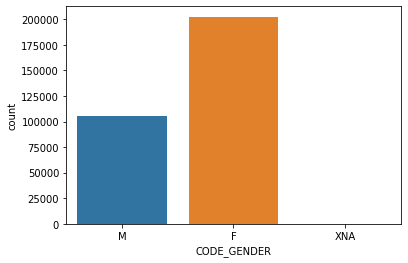

In [ ]:
print('Data TARGET :\n', df_train['CODE_GENDER'].value_counts())
sns.countplot(df_train['CODE_GENDER'])

Data TARGET :
 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


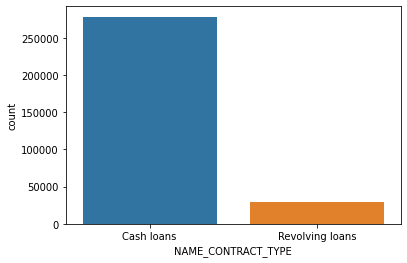

In [ ]:
print('Data TARGET :\n', df_train['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(df_train['NAME_CONTRACT_TYPE'])

Data FLAG_OWN_CAR :
 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


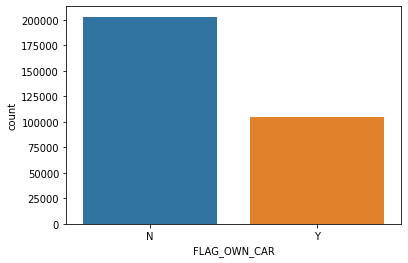

In [ ]:
print('Data FLAG_OWN_CAR :\n', df_train['FLAG_OWN_CAR'].value_counts())
sns.countplot(df_train['FLAG_OWN_CAR'])

Data FLAG_OWN_REALTY :
 Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


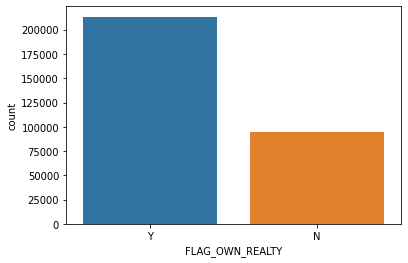

In [ ]:
print('Data FLAG_OWN_REALTY :\n', df_train['FLAG_OWN_REALTY'].value_counts())
sns.countplot(df_train['FLAG_OWN_REALTY'])

Data NAME_TYPE_SUITE :
 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


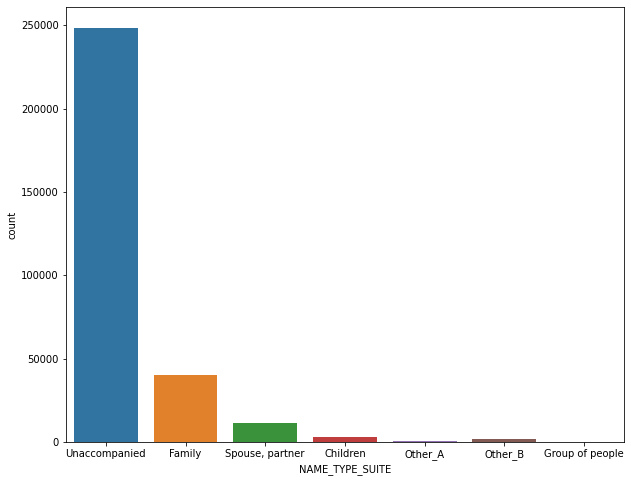

In [ ]:
plt.figure(figsize=(10, 8))
print('Data NAME_TYPE_SUITE :\n', df_train['NAME_TYPE_SUITE'].value_counts())
sns.countplot(df_train['NAME_TYPE_SUITE'])

Data NAME_INCOME_TYPE :
 Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


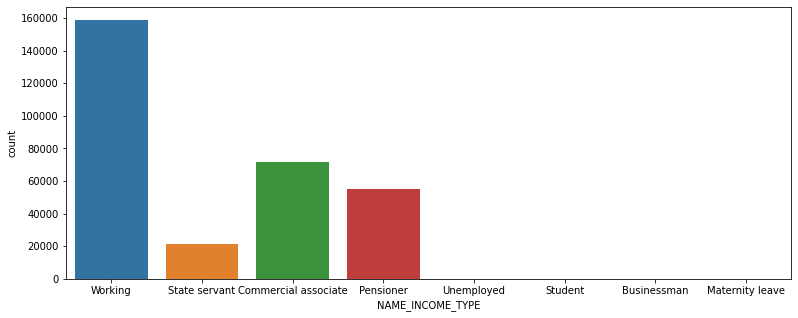

In [ ]:
plt.figure(figsize=(13, 5))
print('Data NAME_INCOME_TYPE :\n', df_train['NAME_INCOME_TYPE'].value_counts())
sns.countplot(df_train['NAME_INCOME_TYPE'])

Data NAME_EDUCATION_TYPE :
 Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


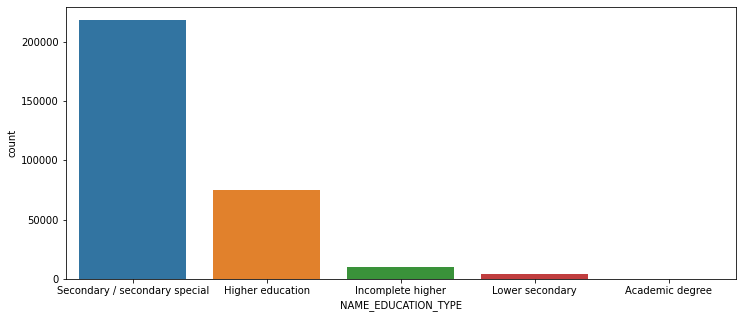

In [ ]:
plt.figure(figsize=(12, 5))
print('Data NAME_EDUCATION_TYPE :\n', df_train['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(df_train['NAME_EDUCATION_TYPE'])

Data NAME_FAMILY_STATUS :
 Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


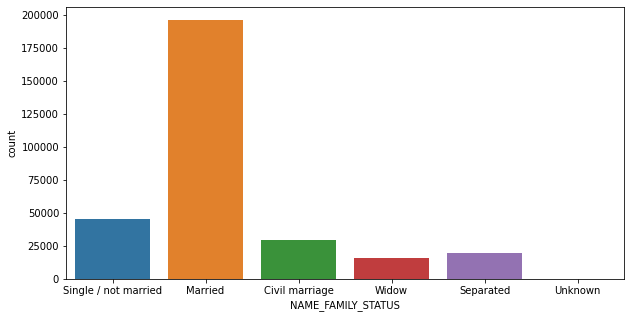

In [ ]:
plt.figure(figsize=(10, 5))
print('Data NAME_FAMILY_STATUS :\n', df_train['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(df_train['NAME_FAMILY_STATUS'])

Data NAME_HOUSING_TYPE :
 House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


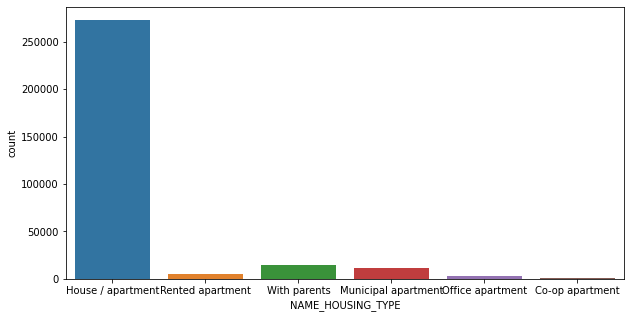

In [ ]:
plt.figure(figsize=(10, 5))
print('Data NAME_HOUSING_TYPE :\n', df_train['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(df_train['NAME_HOUSING_TYPE'])

Data OCCUPATION_TYPE :
 Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


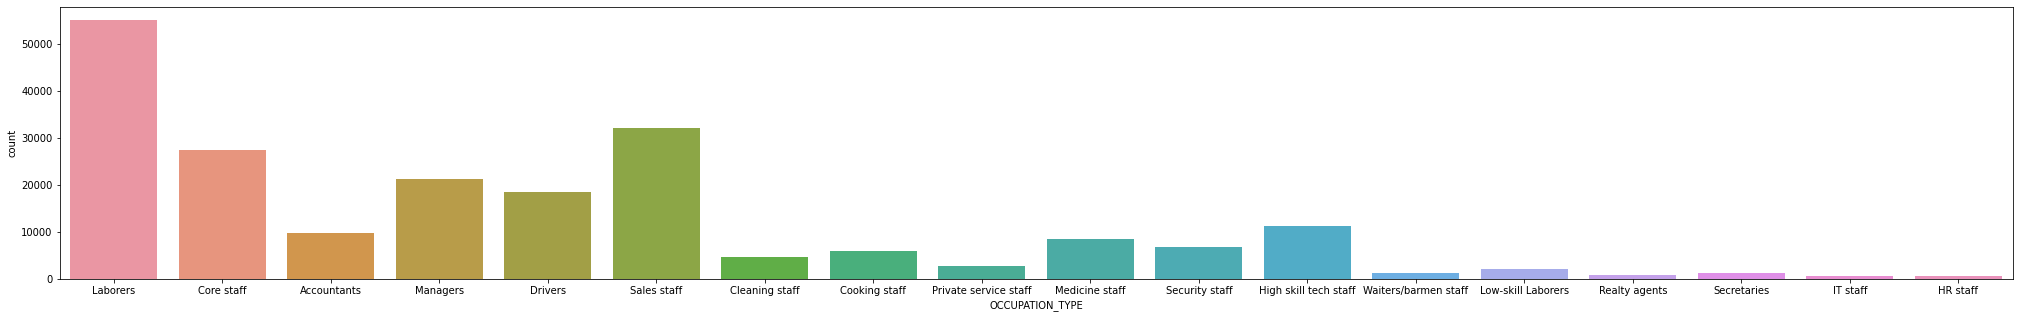

In [ ]:
plt.figure(figsize=(35, 5))
print('Data OCCUPATION_TYPE :\n', df_train['OCCUPATION_TYPE'].value_counts())
sns.countplot(df_train['OCCUPATION_TYPE'])

Data WEEKDAY_APPR_PROCESS_START :
 TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


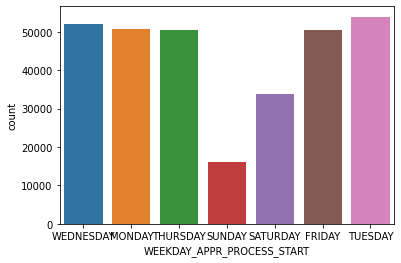

In [ ]:
print('Data WEEKDAY_APPR_PROCESS_START :\n', df_train['WEEKDAY_APPR_PROCESS_START'].value_counts())
sns.countplot(df_train['WEEKDAY_APPR_PROCESS_START'])

In [ ]:
print('Data ORGANIZATION_TYPE :\n', df_train['ORGANIZATION_TYPE'].value_counts())

Data ORGANIZATION_TYPE :
 Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type

Data FONDKAPREMONT_MODE :
 reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64


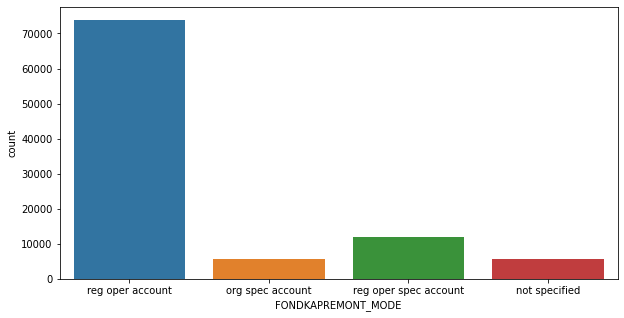

In [ ]:
plt.figure(figsize=(10, 5))
print('Data FONDKAPREMONT_MODE :\n', df_train['FONDKAPREMONT_MODE'].value_counts())
sns.countplot(df_train['FONDKAPREMONT_MODE'])

Data HOUSETYPE_MODE :
 block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64


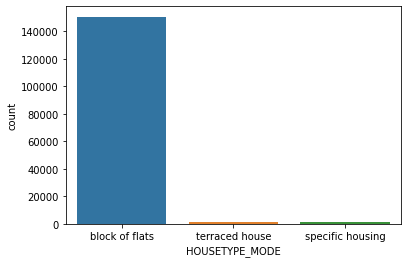

In [ ]:
print('Data HOUSETYPE_MODE :\n', df_train['HOUSETYPE_MODE'].value_counts())
sns.countplot(df_train['HOUSETYPE_MODE'])

Data WALLSMATERIAL_MODE :
 Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64


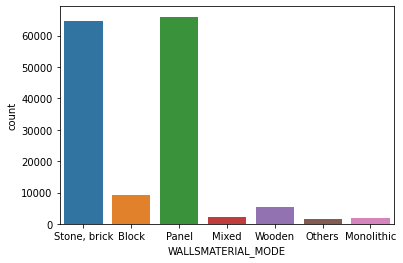

In [ ]:
print('Data WALLSMATERIAL_MODE :\n', df_train['WALLSMATERIAL_MODE'].value_counts())
sns.countplot(df_train['WALLSMATERIAL_MODE'])

Data EMERGENCYSTATE_MODE :
 No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


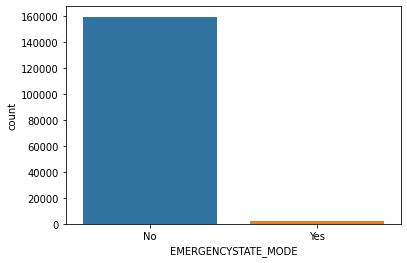

In [ ]:
print('Data EMERGENCYSTATE_MODE :\n', df_train['EMERGENCYSTATE_MODE'].value_counts())
sns.countplot(df_train['EMERGENCYSTATE_MODE'])

## Check and Handle Missing Value & Duplicated

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [3]:
# menampilkan missing value
def chek_missing(df_train):
    sum_nan = df_train.isna().sum().reset_index()
    sum_nan.columns = ['Kolom', 'Jumlah_NaN']
    sum_nan["Persentase"] = sum_nan.Jumlah_NaN/len(df_train)
    return sum_nan.sort_values("Persentase", ascending =  False)
missing = chek_missing(df_train)

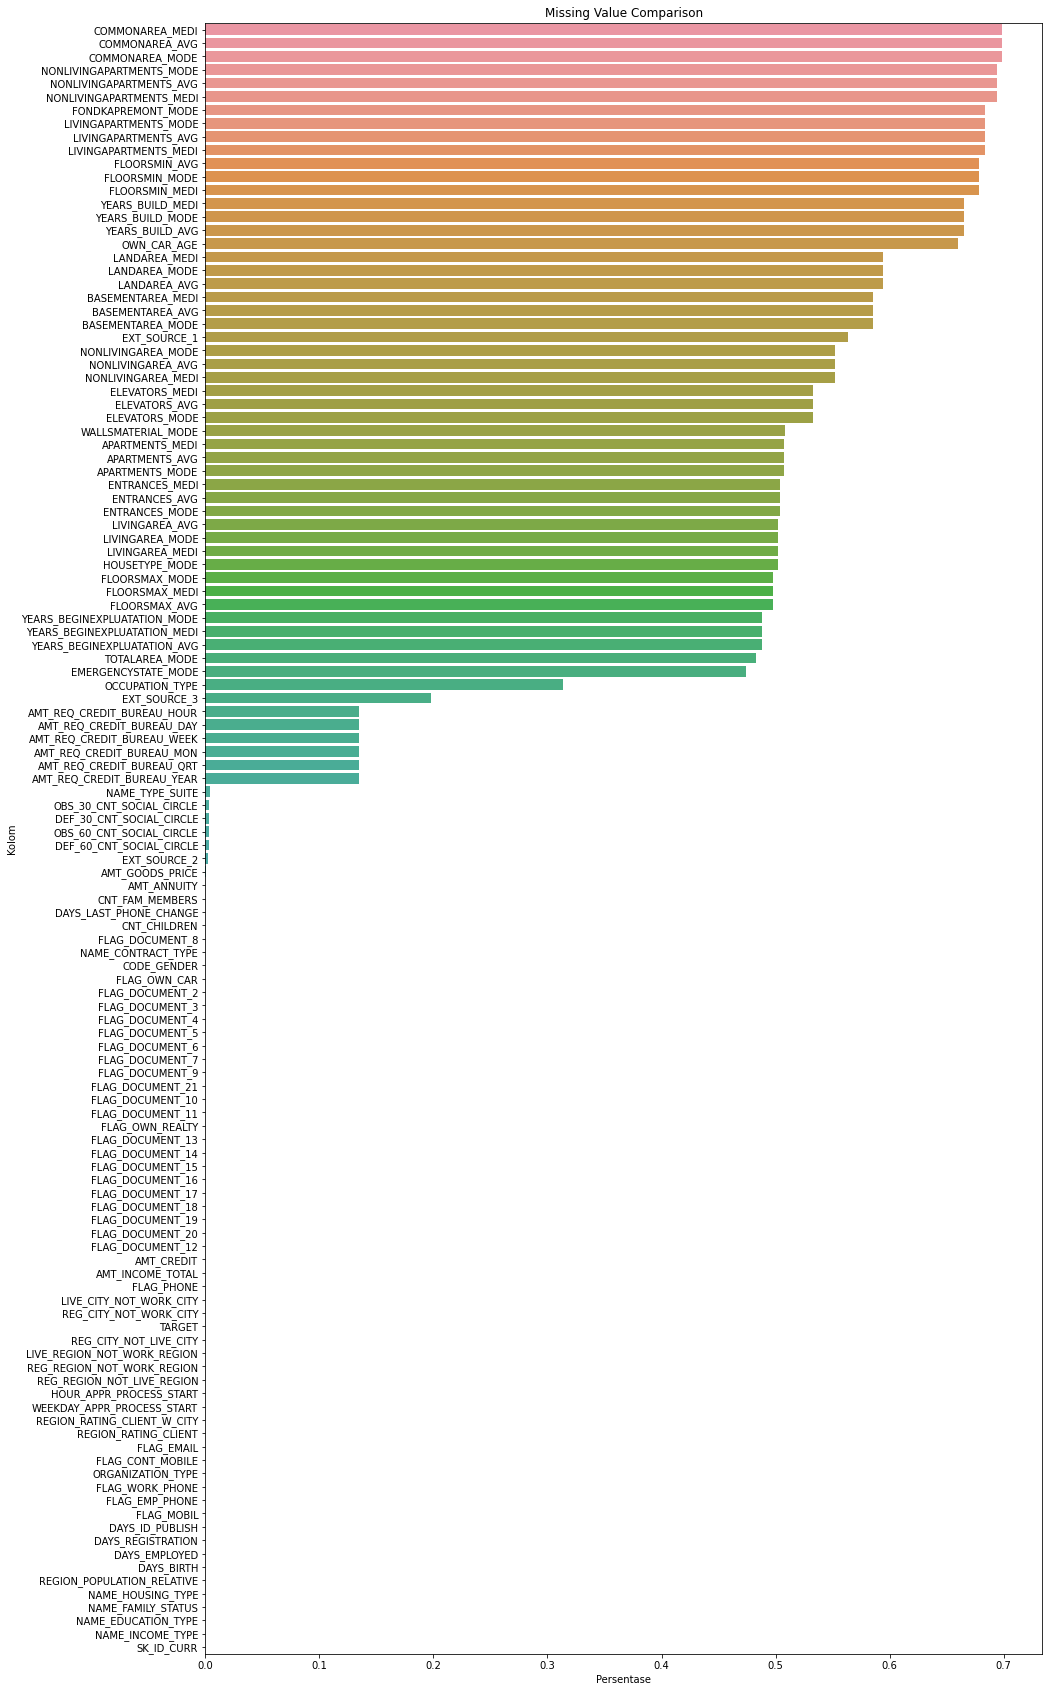

In [4]:
plt.figure(figsize=(15,30))
sns.barplot(y = missing['Kolom'], x = missing['Persentase']).set_title("Missing Value Comparison");

In [5]:
# Menampilkan kolom yang memiliki Missing Value kurang dari 30%

mis = missing[missing.Persentase < 0.3]
mis 

,Kolom,Jumlah_NaN,Persentase
43,EXT_SOURCE_3,60965,0.198253
116,AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
119,AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
11,NAME_TYPE_SUITE,1292,0.004201
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320


In [6]:
# drop kolom yang memiliki missing value yang lebih dari 30% 
df_train2 = df_train.drop(missing[missing.Persentase > 0.3].Kolom.tolist(),1)

In [ ]:
df_train2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train2.shape

(307511, 72)

In [ ]:
df_train2.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [7]:
#Handle Missing Value

df_train3 = df_train2
flt_col = df_train3.columns[df_train3.dtypes==float]
df_train3[flt_col] = df_train3[flt_col].fillna(df_train3[flt_col].mean())

In [8]:
df_train3['NAME_TYPE_SUITE'] = df_train3['NAME_TYPE_SUITE'].fillna('N/A')

In [ ]:
df_train3.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

## Check and Handle Outlier Data

In [10]:
konti_data = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
              'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 
              'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
              'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
              'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
              'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
              ]

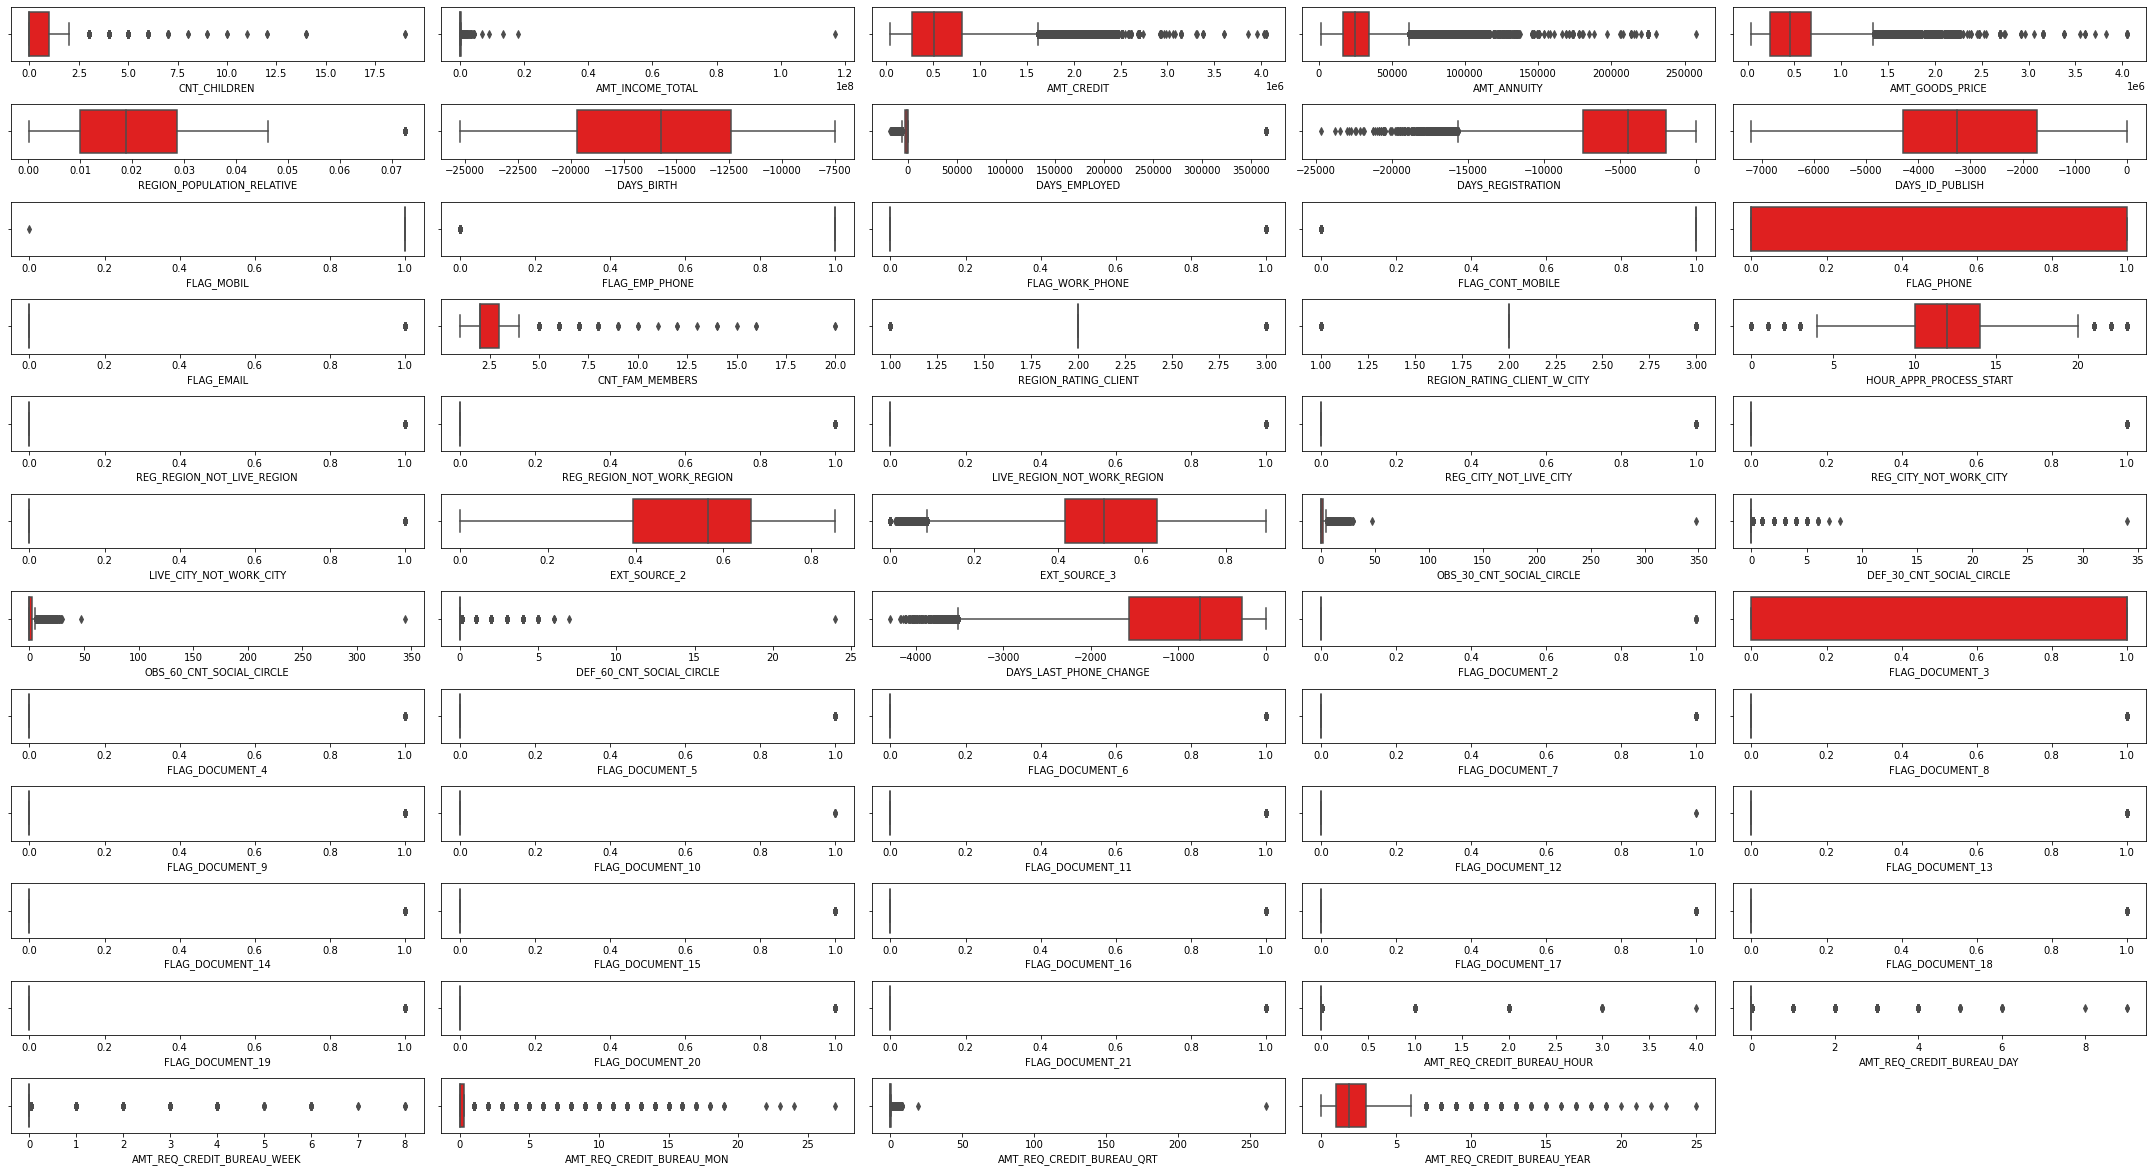

In [ ]:
plt.figure(figsize=(30, 20))
for i in range(0, len(konti_data)):
  plt.subplot(15, 5, i+1)
  sns.boxplot(df_train3[konti_data[i]], color='r')
  plt.tight_layout()

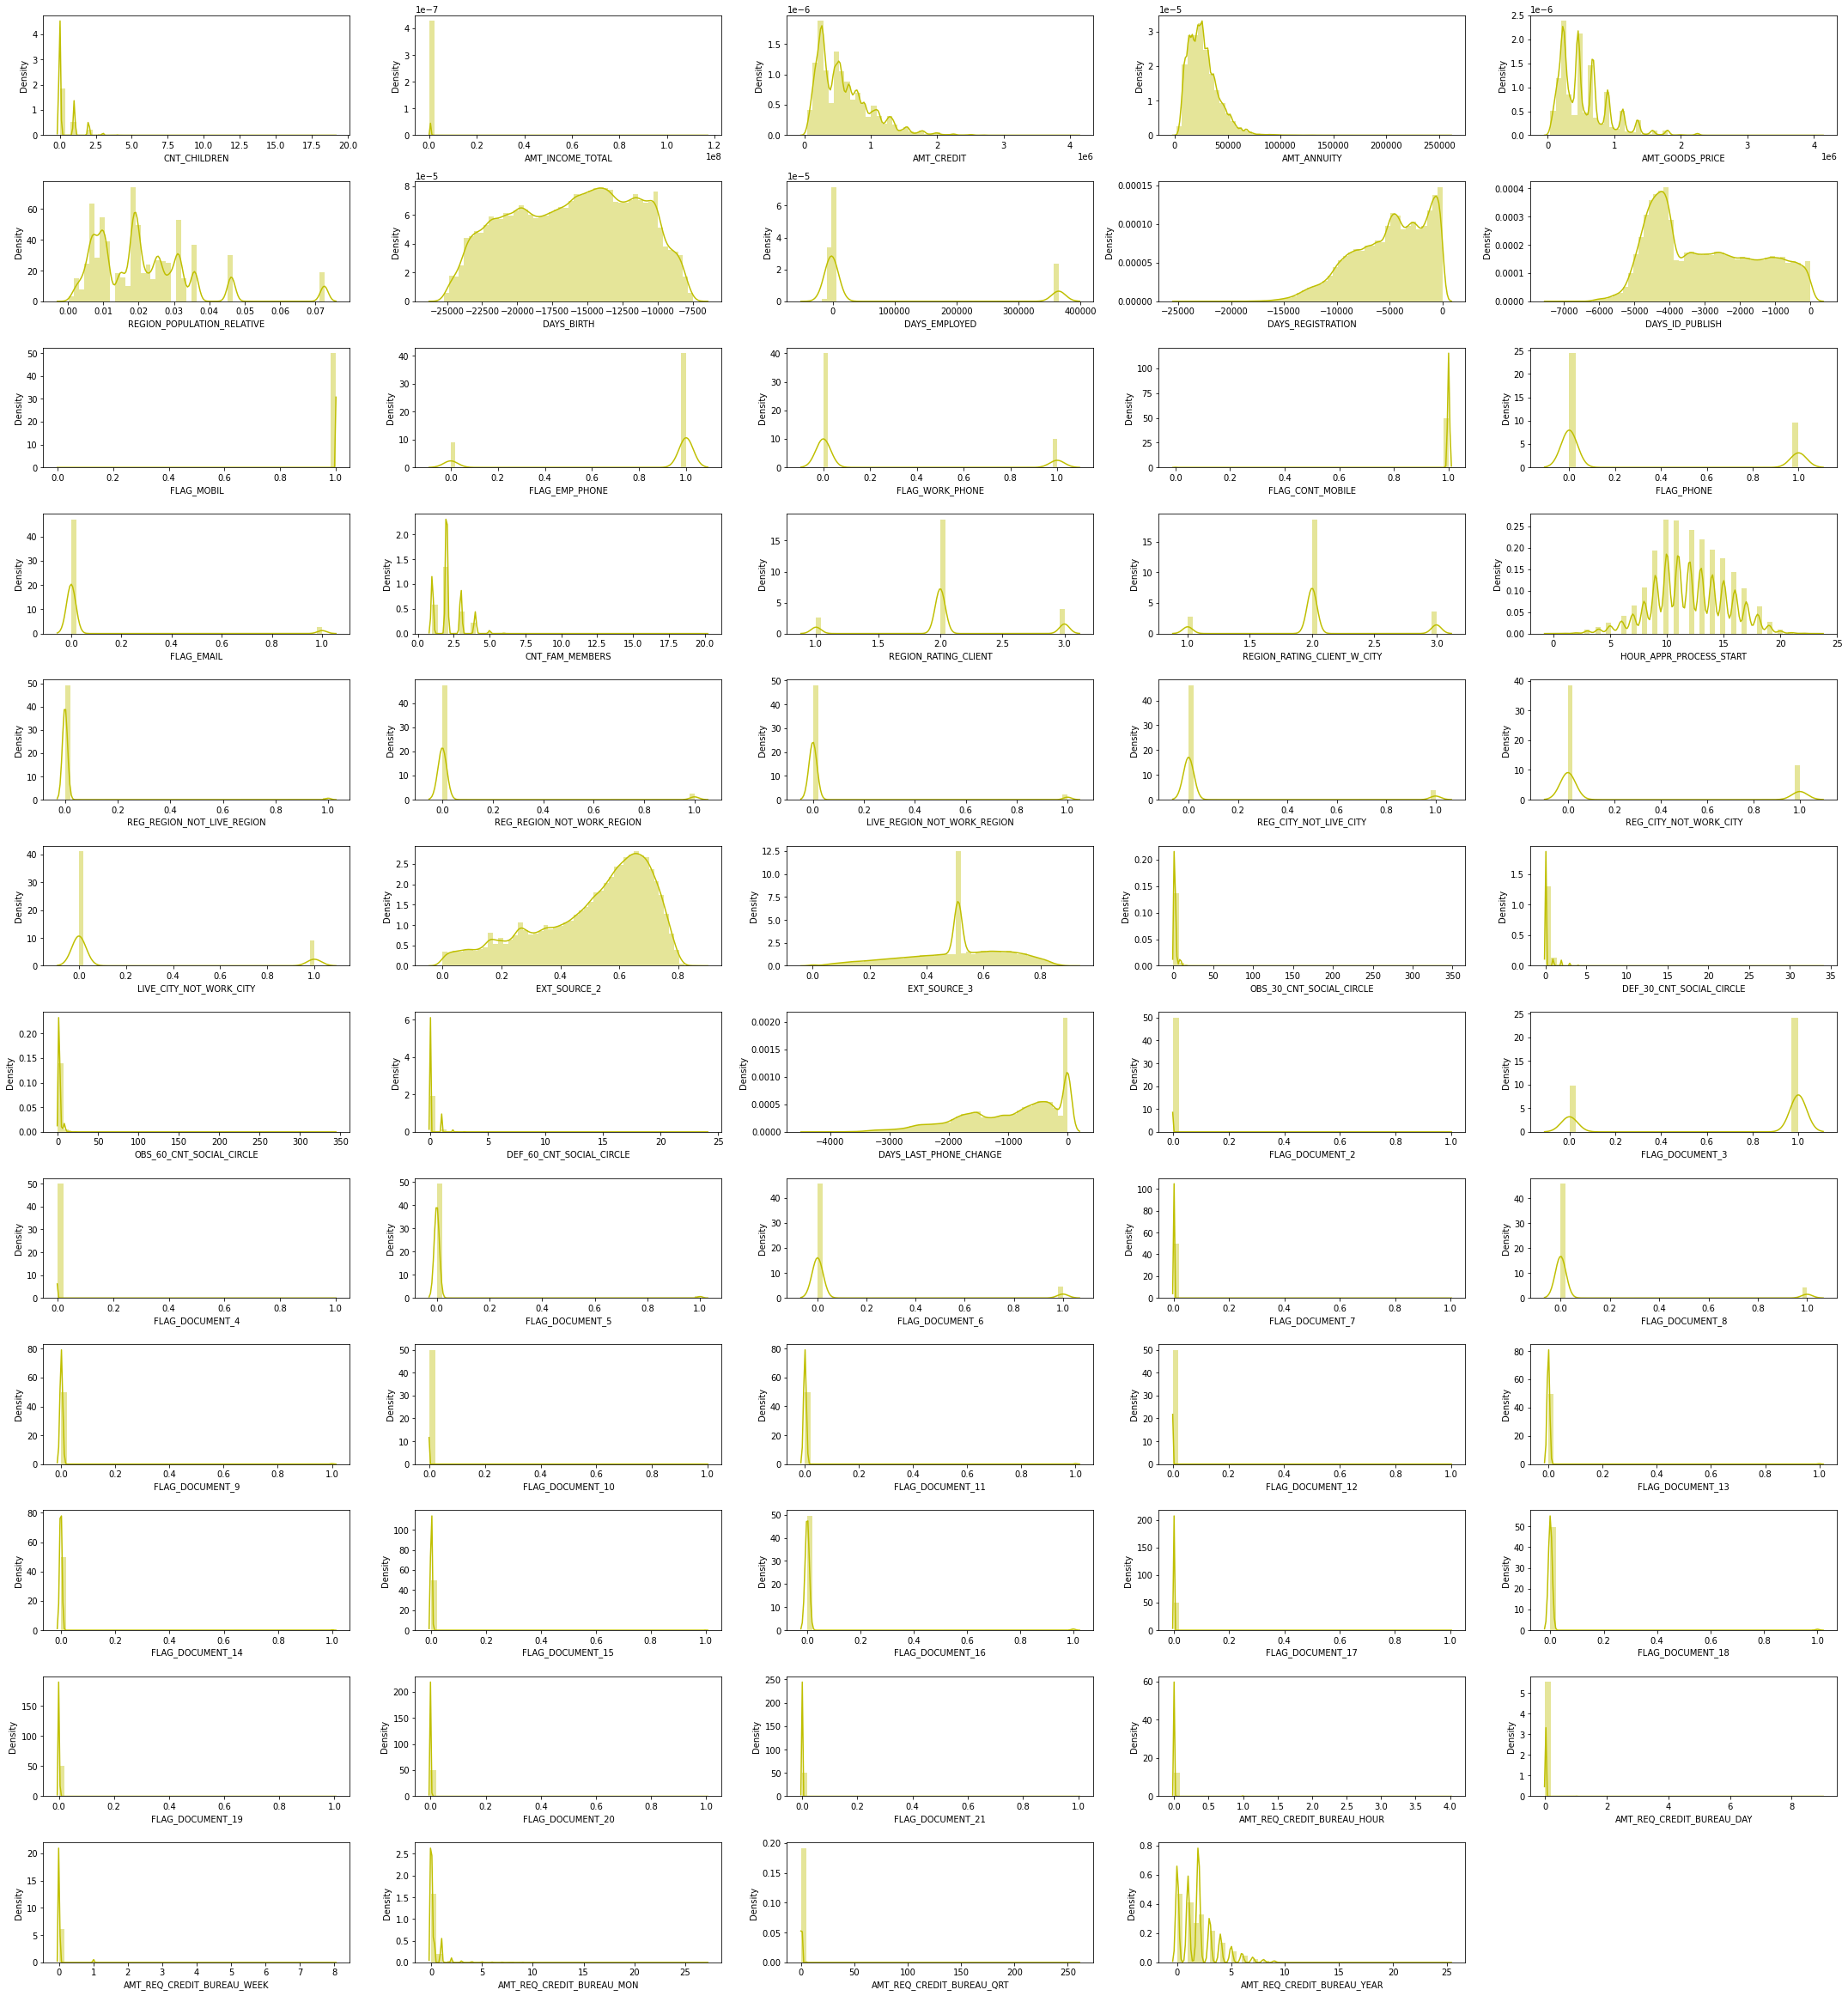

In [11]:
plt.figure(figsize=(30, 40))
for i in range(0, len(konti_data)):
  plt.subplot(15, 5, i+1)
  sns.distplot(df_train3[konti_data[i]], color='y')
  plt.tight_layout()

**Kolom DAYS_EMPLOYED akan di drop karena memiliki data yang kurang baik karena memiliki perbedaan selisih yang jauh. Sedangkan untuk data yang memiliki outlier, outlier akan dibiarkan saja karena tidak banyak.**

## Data Preprocessing

In [ ]:
df_train3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Drop 'DAYS_EMPLOYED', 'SK_ID_CURR'

df_train3.drop(['SK_ID_CURR'], axis=1, inplace=True)
df_train3.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

### LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df_train3['NAME_CONTRACT_TYPE'] = le.fit_transform(df_train3[['NAME_CONTRACT_TYPE']])
df_train3['CODE_GENDER'] = le.fit_transform(df_train3[['CODE_GENDER']])
df_train3['FLAG_OWN_CAR'] = le.fit_transform(df_train3[['FLAG_OWN_CAR']])
df_train3['FLAG_OWN_REALTY'] = le.fit_transform(df_train3[['FLAG_OWN_REALTY']])
df_train3['NAME_TYPE_SUITE'] = le.fit_transform(df_train3[['NAME_TYPE_SUITE']])
df_train3['NAME_INCOME_TYPE'] = le.fit_transform(df_train3[['NAME_INCOME_TYPE']])
df_train3['NAME_EDUCATION_TYPE'] = le.fit_transform(df_train3[['NAME_EDUCATION_TYPE']])
df_train3['NAME_FAMILY_STATUS'] = le.fit_transform(df_train3[['NAME_FAMILY_STATUS']])
df_train3['NAME_HOUSING_TYPE'] = le.fit_transform(df_train3[['NAME_HOUSING_TYPE']])
df_train3['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df_train3[['WEEKDAY_APPR_PROCESS_START']])
df_train3['ORGANIZATION_TYPE'] = le.fit_transform(df_train3[['ORGANIZATION_TYPE']])

### MinMaxScaler

In [ ]:
mx = MinMaxScaler()

In [ ]:
df_train3['AMT_INCOME_TOTAL'] = mx.fit_transform(df_train3[['AMT_INCOME_TOTAL']])
df_train3['AMT_CREDIT'] = mx.fit_transform(df_train3[['AMT_CREDIT']])
df_train3['AMT_ANNUITY'] = mx.fit_transform(df_train3[['AMT_ANNUITY']])
df_train3['AMT_GOODS_PRICE'] = mx.fit_transform(df_train3[['AMT_GOODS_PRICE']])
df_train3['DAYS_BIRTH'] = mx.fit_transform(df_train3[['DAYS_BIRTH']])
df_train3['DAYS_REGISTRATION'] = mx.fit_transform(df_train3[['DAYS_REGISTRATION']])
df_train3['DAYS_ID_PUBLISH'] = mx.fit_transform(df_train3[['DAYS_ID_PUBLISH']])
df_train3['HOUR_APPR_PROCESS_START'] = mx.fit_transform(df_train3[['HOUR_APPR_PROCESS_START']])
df_train3['DAYS_LAST_PHONE_CHANGE'] = mx.fit_transform(df_train3[['DAYS_LAST_PHONE_CHANGE']])

In [ ]:
df_train3.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,7,7,4,3,1,0.018801,0.888839,0.852140,0.705433,1,1,0,1,1,0,1.0,2,2,6,0.434783,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,0.735788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,1,4,1,1,1,0.003541,0.477114,0.951929,0.959566,1,1,0,1,1,0,2.0,1,1,1,0.478261,0,0,0,0,0,0,39,0.622246,0.510853,1.0,0.0,1.0,0.0,0.807083,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0,1,1,1,1,0,0.000358,0.022472,0.020025,0.023569,7,7,4,3,1,0.010032,0.348534,0.827335,0.648326,1,1,1,1,1,0,1.0,2,2,1,0.391304,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,0.810112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,0,0,0,1,0,0.000935,0.066837,0.109477,0.063973,7,7,4,0,1,0.008019,0.350846,0.601451,0.661387,1,1,0,1,0,0,2.0,2,2,6,0.739130,0,0,0,0,0,0,5,0.650442,0.510853,2.0,0.0,2.0,0.0,0.856244,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,0,1,0,1,0,0.000819,0.116854,0.078975,0.117845,7,7,4,3,1,0.028663,0.298591,0.825268,0.519522,1,1,0,1,0,0,1.0,2,2,4,0.478261,0,0,0,0,1,1,37,0.322738,0.510853,0.0,0.0,0.0,0.0,0.742311,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


## Feature Selection

In [ ]:
X = df_train3.drop(columns = ['TARGET'])
y = df_train3['TARGET'].values

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(50,'Score'))

                          Specs        Score
35            ORGANIZATION_TYPE  4138.607485
10             NAME_INCOME_TYPE   934.903558
33       REG_CITY_NOT_WORK_CITY   615.377434
1                   CODE_GENDER   605.629339
36                 EXT_SOURCE_2   559.571685
32       REG_CITY_NOT_LIVE_CITY   558.708941
11          NAME_EDUCATION_TYPE   486.754127
37                 EXT_SOURCE_3   453.906793
39     DEF_30_CNT_SOCIAL_CIRCLE   442.715197
41     DEF_60_CNT_SOCIAL_CIRCLE   392.690795
34      LIVE_CITY_NOT_WORK_CITY   266.788515
0            NAME_CONTRACT_TYPE   265.588342
13            NAME_HOUSING_TYPE   256.450950
47              FLAG_DOCUMENT_6   229.413358
15                   DAYS_BIRTH   219.842981
20              FLAG_WORK_PHONE   200.319862
44              FLAG_DOCUMENT_3   175.363553
68   AMT_REQ_CREDIT_BUREAU_YEAR   161.329280
26  REGION_RATING_CLIENT_W_CITY   141.856657
4                  CNT_CHILDREN   141.550011
25         REGION_RATING_CLIENT   134.676974
22        

In [ ]:
fix_df_train = df_train3.get(['TARGET','ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE', 'EXT_SOURCE_3', 
                              'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_6', 'DAYS_BIRTH', 'FLAG_WORK_PHONE',
                              'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN', 'REGION_RATING_CLIENT', 'FLAG_PHONE', 'FLAG_EMP_PHONE', 'AMT_REQ_CREDIT_BUREAU_MON',
                              'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'])

## Split Data & SMOTE

In [ ]:
X_fix = fix_df_train.drop(columns = ['TARGET'])
y_fix = fix_df_train['TARGET'].values

In [ ]:
X_fix_train, X_fix_test, y_fix_train, y_fix_test = train_test_split(X_fix, y_fix, test_size = 0.2, random_state = 1)
X_fix_train.shape, X_fix_test.shape, y_fix_train.shape, y_fix_test.shape

((246008, 26), (61503, 26), (246008,), (61503,))

### SMOTE

In [ ]:
smot = SMOTE(sampling_strategy='minority')

In [ ]:
from collections import Counter

counter = Counter(y_fix_train)
print('Before',counter)

#Xn_train_sm, y_train_sm = smt.fit_resample(Xn_train, y_train)
X_smot, y_smot = smot.fit_resample(X_fix_train, y_fix_train)

counter = Counter(y_smot)
print('After', counter)

Before Counter({0: 226153, 1: 19855})
After Counter({0: 226153, 1: 226153})


## Modelling

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_smot, y_smot)

LogisticRegression()

In [ ]:
lr_model_pred = lr_model.predict(X_fix_test)

In [ ]:
print("Accuracy :", metrics.accuracy_score(y_fix_test, lr_model_pred))
print("Precision :", metrics.precision_score(y_fix_test, lr_model_pred))
print("Recall :", metrics.recall_score(y_fix_test, lr_model_pred))

print("F1 Score :", metrics.f1_score(y_fix_test, lr_model_pred))

Accuracy : 0.685917760109263
Precision : 0.14277177431402818
Recall : 0.5768611670020121
F1 Score : 0.22889305816135086


#### Hypertuning Parameters

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

scoring = {"accuracy": make_scorer(accuracy_score)}
parameters = [
    {"solver": ["newton-cg"], 'penalty':['none', 'l2']},
    {"solver": ["lbfgs"], 'penalty':['none', 'l2']},
    {"solver": ["liblinear"], 'penalty':['l1', 'l2']},
    {"solver": ["sag"], 'penalty':['none', 'l2']},
    {"solver": ["saga"], 'penalty':['l1', 'l2']},
]
lr_model2 = LogisticRegression()

gridSearch_lr = GridSearchCV(
    estimator = lr_model2, 
    param_grid = parameters,  
    scoring=scoring,
    refit="accuracy",
    return_train_score=True,)

gridSearch_lr.fit(X_smot, y_smot)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'penalty': ['none', 'l2'], 'solver': ['newton-cg']},
                         {'penalty': ['none', 'l2'], 'solver': ['lbfgs']},
                         {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'penalty': ['none', 'l2'], 'solver': ['sag']},
                         {'penalty': ['l1', 'l2'], 'solver': ['saga']}],
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score)})

In [ ]:
results_df = pd.DataFrame(gridSearch_lr.cv_results_)

results_df = results_df.sort_values(by=["rank_test_accuracy"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")

results_df[["params", "rank_test_accuracy", "mean_test_accuracy", "std_test_accuracy"]]

,params,rank_test_accuracy,mean_test_accuracy,std_test_accuracy
kernel,,,,
l2_newton-cg,"{'penalty': 'l2', 'solver': 'newton-cg'}",1,0.709900,0.017607
none_newton-cg,"{'penalty': 'none', 'solver': 'newton-cg'}",2,0.709891,0.017613
l1_liblinear,"{'penalty': 'l1', 'solver': 'liblinear'}",3,0.709889,0.017617
l2_liblinear,"{'penalty': 'l2', 'solver': 'liblinear'}",4,0.709885,0.017610
none_lbfgs,"{'penalty': 'none', 'solver': 'lbfgs'}",5,0.708507,0.017545
none_sag,"{'penalty': 'none', 'solver': 'sag'}",6,0.708235,0.017272
l2_sag,"{'penalty': 'l2', 'solver': 'sag'}",7,0.708213,0.017261
l2_lbfgs,"{'penalty': 'l2', 'solver': 'lbfgs'}",8,0.708105,0.018186
l2_saga,"{'penalty': 'l2', 'solver': 'saga'}",9,0.704866,0.017577


In [ ]:
# best param
gridSearch_lr.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# buat LogisticRegression
lr_model_fix = LogisticRegression(solver='newton-cg',penalty='l2')
print(lr_model_fix.get_params())

# Train model
lr_model_fix.fit(X_smot, y_smot)

# test
lr_model_fix_pred = lr_model_fix.predict(X_fix_test)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
print("Accuracy Logistic Regression :", metrics.accuracy_score(y_fix_test, lr_model_fix_pred))
print("Precision Logistic Regression :", metrics.precision_score(y_fix_test, lr_model_fix_pred))
print("Recall Logistic Regression :", metrics.recall_score(y_fix_test, lr_model_fix_pred))
print("F1 Score Logistic Regression :", metrics.f1_score(y_fix_test, lr_model_fix_pred))

Accuracy : 0.6886005560704356
Precision : 0.14309442319307428
Recall : 0.5720321931589537
F1 Score : 0.22892342378613414


Confusion Matrix:
 [[39508 17025]
 [ 2127  2843]]


Text(0.5, 1.0, 'Confusion Matrix')

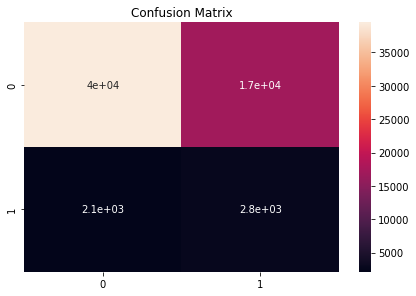

In [ ]:
lr_model_cnf_matrix = metrics.confusion_matrix(y_fix_test, lr_model_fix_pred)
print('Confusion Matrix Logistic Regression:\n', lr_model_cnf_matrix)

kelas=['0', '1']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(lr_model_cnf_matrix), annot=True, xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regression')

### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_smot, y_smot)

DecisionTreeClassifier()

In [ ]:
dt_model_pred = dt_model.predict(X_fix_test)

In [ ]:
print("Accuracy :", metrics.accuracy_score(y_fix_test, dt_model_pred))
print("Precision :", metrics.precision_score(y_fix_test, dt_model_pred))
print("Recall :", metrics.recall_score(y_fix_test, dt_model_pred))

print("F1 Score :", metrics.f1_score(y_fix_test, dt_model_pred))

Accuracy : 0.7611336032388664
Precision : 0.11604392132079944
Recall : 0.2955734406438632
F1 Score : 0.16665721254750696


#### Hypertuning Parameters

In [ ]:
scoring = {"accuracy": make_scorer(accuracy_score)}
parameters = [
    {'criterion': ['gini','entropy'], 'splitter':['best','random']},
]
dt_model2 = DecisionTreeClassifier()

gridSearch_dt = GridSearchCV(
    estimator = dt_model2, 
    param_grid = parameters,  
    scoring=scoring,
    refit="accuracy",
    return_train_score=True,)

gridSearch_dt.fit(X_smot, y_smot)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'splitter': ['best', 'random']}],
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score)})

In [ ]:
results_df_dt = pd.DataFrame(gridSearch_dt.cv_results_)

results_df_dt = results_df_dt.sort_values(by=["rank_test_accuracy"])
results_df_dt = results_df_dt.set_index(
    results_df_dt["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")

results_df_dt[["params", "rank_test_accuracy", "mean_test_accuracy", "std_test_accuracy"]]

,params,rank_test_accuracy,mean_test_accuracy,std_test_accuracy
kernel,,,,
entropy_best,"{'criterion': 'entropy', 'splitter': 'best'}",1,0.811712,0.026283
gini_best,"{'criterion': 'gini', 'splitter': 'best'}",2,0.806649,0.025079
entropy_random,"{'criterion': 'entropy', 'splitter': 'random'}",3,0.781506,0.014467
gini_random,"{'criterion': 'gini', 'splitter': 'random'}",4,0.781011,0.014573


In [ ]:
# best param
gridSearch_dt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [ ]:
dt_model_fix = DecisionTreeClassifier(criterion='entropy',splitter='best')

# Train model
dt_model_fix.fit(X_smot, y_smot)

# test
dt_model_fix_pred = dt_model_fix.predict(X_fix_test)

In [ ]:
print("Accuracy Decision Tree :", metrics.accuracy_score(y_fix_test, dt_model_fix_pred))
print("Precision Decision Tree :", metrics.precision_score(y_fix_test, dt_model_fix_pred))
print("Recall Decision Tree :", metrics.recall_score(y_fix_test, dt_model_fix_pred))
print("F1 Score Decision Tree :", metrics.f1_score(y_fix_test, dt_model_fix_pred))

Accuracy : 0.7617189405394859
Precision : 0.11478800413650465
Recall : 0.2903420523138833
F1 Score : 0.1645288181973662


Confusion Matrix:
 [[45405 11128]
 [ 3527  1443]]


Text(0.5, 1.0, 'Confusion Matrix')

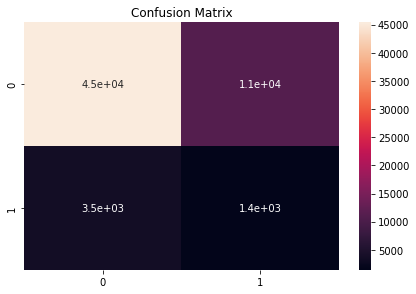

In [ ]:
dt_model_cnf_matrix = metrics.confusion_matrix(y_fix_test, dt_model_fix_pred)
print('Confusion Matrix:\n', dt_model_cnf_matrix)

kelas=['0', '1']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(dt_model_cnf_matrix), annot=True, xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix')